# References
## 
* 

# Parameters adjusted
* 

# Considerations
* 

In [1]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook
from collections import OrderedDict

import matplotlib.pyplot as plt
plt.rc('axes.formatter', useoffset=False)
import numpy as np
import time
import glob

In [3]:
def ensambleFR(spikeInstant, unitNumber, transientPeriod, simDuration):
    units = list(OrderedDict.fromkeys(unitNumber))
    
    if len(units) == 0:
        return 0
    else:
        meanFR = []
        for unit in units:
            MNSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==unit]
            numberOfSpikes = len([x for x in MNSpikeInstants if x>transientPeriod])
            meanFR.append(numberOfSpikes/(simDuration*1e-3 - transientPeriod*1e-3))

    #     popSlice = [y for x, y in enumerate(meanFR) if x>100 and x<200]
    #     sliceFR = sum(popSlice)/(len(popSlice))
    #     FR = sum(meanFR)/len(meanFR)

    #     plt.figure()
    #     plt.plot(units, meanFR, 'o')
    #     plt.axhline(y=FR, color='r', linestyle='-')
    #     plt.axhline(y=sliceFR, color='k', linestyle='-')
    #     plt.show()

        return sum(meanFR)/len(units)

# With Renshaw cell

In [6]:
numberMN = 500
tmin = 1000
simDuration = 2000
pps = range(5, 575, 38)

<IPython.core.display.Javascript object>


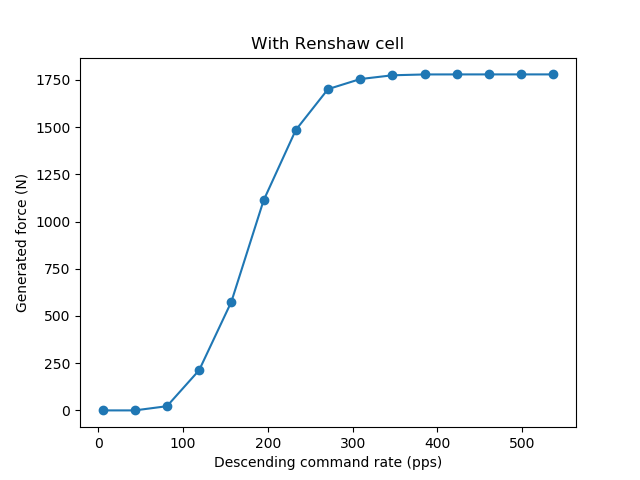

<IPython.core.display.Javascript object>


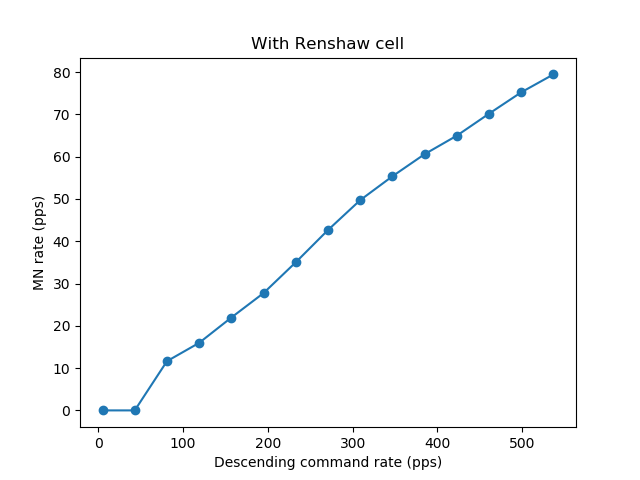

In [7]:
files=glob.glob("*.dat")
spikesFiles = [x for x in files if 'force' not in x]
spikesFiles.sort()
forcesFiles = [x for x in files if 'spks' not in x]
forcesFiles.sort()

rateOnTrialC = []
forceOnTrialC = []
for filename in spikesFiles:
    spikeInstant = []
    unitNumber = []
    
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        spikeInstant.append(float(line.split()[0]))
        unitNumber.append(int(float(line.split()[1])))
    f.close()
    
    rateOnTrialC.append(ensambleFR(spikeInstant, unitNumber, tmin, simDuration))
    
for filename in forcesFiles:
    force = []
    instant = []
    
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        instant.append(float(line.split()[0]))
        force.append(float(line.split()[1]))
    f.close()
    
    staticForce = [y for x,y in enumerate(force) if instant[x]>tmin]
    forceOnTrialC.append(np.mean(staticForce))

# plt.figure()
# plt.plot(pps, forceOnTrialC, 'o-')
# plt.title('With Renshaw cell')
# plt.ylabel('Generated force (N)')
# plt.xlabel('Descending command rate (pps)')
# plt.show()

# plt.figure()
# plt.plot(pps, rateOnTrialC, 'o-')
# plt.title('With Renshaw cell')
# plt.ylabel('MN rate (pps)')
# plt.xlabel('Descending command rate (pps)')
# plt.show()

# Without Renshaw cell

<IPython.core.display.Javascript object>


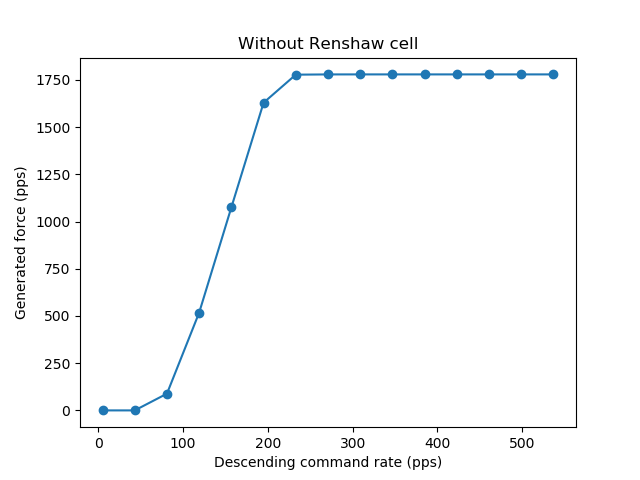

<IPython.core.display.Javascript object>


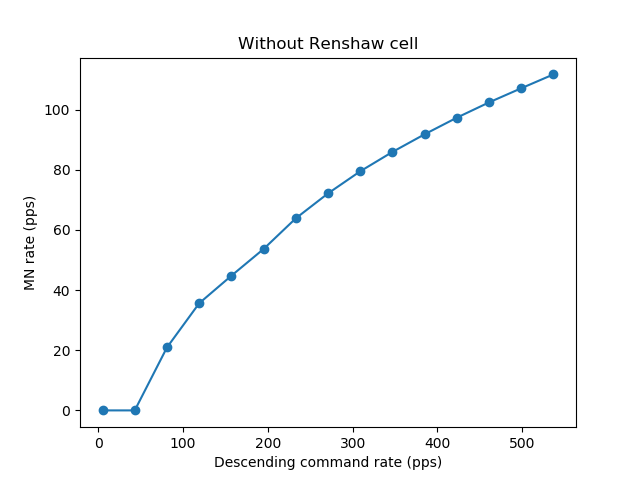

In [8]:
files=glob.glob("datNoRC/*.dat")
spikesFiles = [x for x in files if 'force' not in x]
spikesFiles.sort()
forcesFiles = [x for x in files if 'spks' not in x]
forcesFiles.sort()

rateOnTrialO = []
forceOnTrialO = []
for filename in spikesFiles:
    spikeInstant = []
    unitNumber = []
    
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        spikeInstant.append(float(line.split()[0]))
        unitNumber.append(int(float(line.split()[1])))
    f.close()
    
    rateOnTrialO.append(ensambleFR(spikeInstant, unitNumber, tmin, simDuration))
    
for filename in forcesFiles:
    force = []
    instant = []
    
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        instant.append(float(line.split()[0]))
        force.append(float(line.split()[1]))
    f.close()
    
    staticForce = [y for x,y in enumerate(force) if instant[x]>tmin]
    forceOnTrialO.append(np.mean(staticForce))

plt.figure()
plt.plot(pps, forceOnTrialO, 'o-')
plt.title('Without Renshaw cell')
plt.ylabel('Generated force (pps)')
plt.xlabel('Descending command rate (pps)')
plt.show()

plt.figure()
plt.plot(pps, rateOnTrialO, 'o-')
plt.title('Without Renshaw cell')
plt.ylabel('MN rate (pps)')
plt.xlabel('Descending command rate (pps)')
plt.show()

<IPython.core.display.Javascript object>


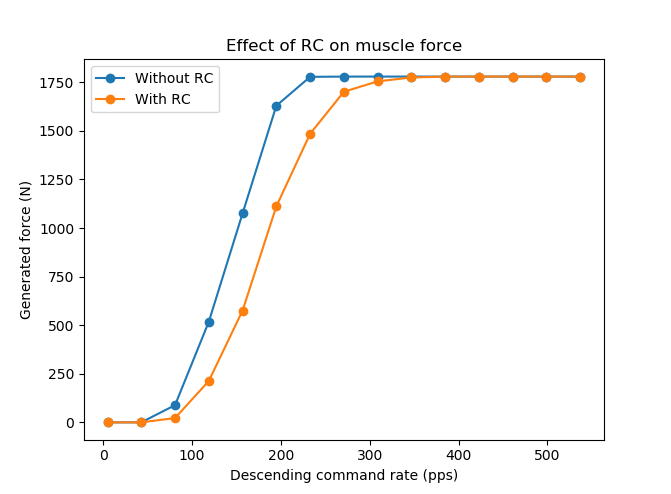

<IPython.core.display.Javascript object>


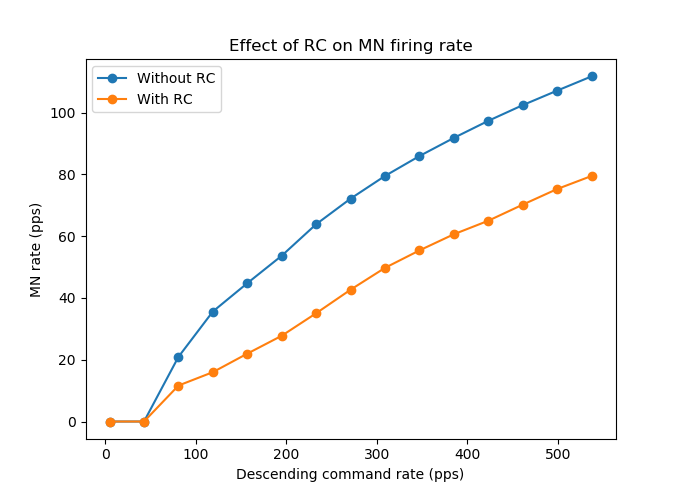

In [9]:
plt.figure()
plt.plot(pps, forceOnTrialO, 'o-', label='Without RC')
plt.plot(pps, forceOnTrialC, 'o-', label='With RC')
plt.title('Effect of RC on muscle force')
plt.ylabel('Generated force (N)')
plt.xlabel('Descending command rate (pps)')
plt.legend()
plt.show()

plt.figure()
plt.plot(pps, rateOnTrialO, 'o-', label='Without RC')
plt.plot(pps, rateOnTrialC, 'o-', label='With RC')
plt.title('Effect of RC on MN firing rate')
plt.ylabel('MN rate (pps)')
plt.xlabel('Descending command rate (pps)')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


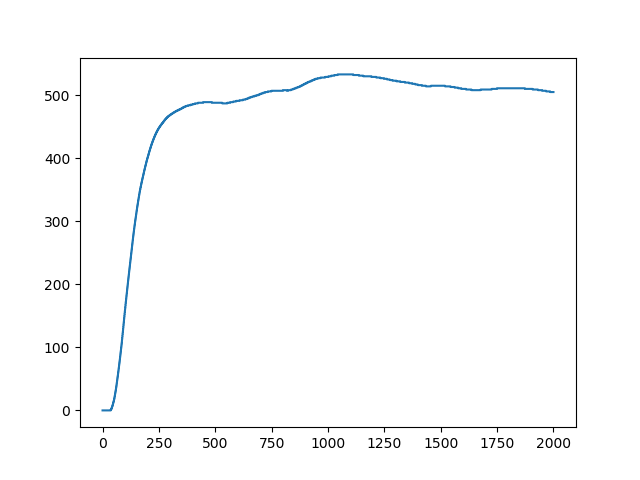

In [11]:
x = []
y = []
f = open('datNoRC/force 4.dat', 'r')
lines = f.readlines()
for line in lines:
    x.append(float(line.split()[0]))
    y.append(int(float(line.split()[1])))
f.close()

plt.figure()
plt.plot(x,y)
plt.show()